In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
dataset = pd.read_csv("ds_prt.csv", delimiter=';')
print(dataset)

      Partner  Dependents  OnlineSecurity  DeviceProtection  TechSupport  \
0         0.0         0.0             0.0               0.0          0.0   
1         1.0         0.0             1.0               1.0          0.0   
2         1.0         0.0             1.0               0.0          0.0   
3         1.0         0.0             1.0               1.0          1.0   
4         1.0         0.0             0.0               0.0          0.0   
...       ...         ...             ...               ...          ...   
7027      0.0         1.0             1.0               1.0          1.0   
7028      0.0         1.0             0.0               1.0          0.0   
7029      0.0         1.0             1.0               0.0          0.0   
7030      0.0         0.0             0.0               0.0          0.0   
7031      1.0         0.0             1.0               1.0          1.0   

      StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0     

In [3]:
x = dataset.iloc[0:, :13]
x

,Partner,Dependents,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440296,-1.280157,-1.161611
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.440296,0.064298,-0.260859
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.440296,-1.239416,-0.363897
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,-0.440296,0.512450,-0.747797
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440296,-1.239416,0.196164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-0.440296,-0.343113,0.664821
7028,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,-0.440296,1.612459,1.276402
7029,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440296,-0.872746,-1.169921
7030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.270878,-1.157934,0.319145


In [4]:
y= dataset.iloc[0:,14]
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7027    0.0
7028    0.0
7029    0.0
7030    1.0
7031    0.0
Name: Churn, Length: 7032, dtype: float64

In [5]:
X = np.array(x)
print(X)


[[ 0.          0.          0.         ... -0.44029578 -1.280157
  -1.16161133]
 [ 1.          0.          1.         ... -0.44029578  0.06429811
  -0.26085937]
 [ 1.          0.          1.         ... -0.44029578 -1.23941594
  -0.36389742]
 ...
 [ 0.          1.          1.         ... -0.44029578 -0.87274636
  -1.16992085]
 [ 0.          0.          0.         ...  2.27087753 -1.15793381
   0.31914512]
 [ 1.          0.          1.         ... -0.44029578  1.36801217
   1.35783512]]


In [6]:
y = np.array(y)
print(y)
y[1]

[0. 0. 1. ... 0. 1. 0.]


0.0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
print(y_train)
y_train[10]

[0. 0. 0. ... 0. 0. 0.]


1.0

In [8]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

In [9]:
X_train[1]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        , -0.44029578, -0.30237146,  1.00883528])

In [10]:
theta = np.random.randn(X_train.shape[1])
print(theta)

[ 0.1047574   0.22280672 -2.34598282 -0.55999126  0.39874064  0.01743276
 -0.11130947 -1.90312731  1.01628963 -0.63752266 -1.65283145 -1.42298754
  0.12245845 -0.67116406]


In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
def cost_function(X, y, theta):
    h = sigmoid(X.dot(theta))
    m = len(y)
    J = -1/m * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
    return J

In [13]:
def gradient_descent(X_train, y_train, theta, alpha, num_iters):
    m = len(y_train)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta))
        theta = theta - alpha/m * X_train.T.dot(h - y_train)
        J_history[i] = cost_function(X_train, y_train, theta)

    return theta, J_history

In [14]:

# Paramètres d'apprentissage
learning_rate = 0.02
num_iterations = 10000

# Entraînement du modèle
theta, J_history = gradient_descent(X_train, y_train,theta, learning_rate, num_iterations)


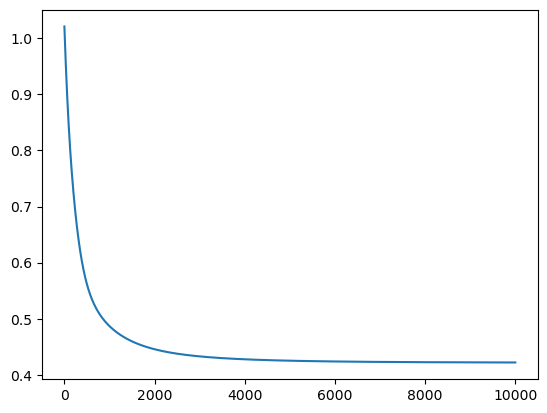

In [15]:
plt.plot(np.arange(num_iterations), J_history)
plt.show()

In [16]:
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
y_pridect=theta*X_test
y_pridect[5]

array([-0.32567529, -0.        , -0.        , -0.4888178 , -0.        ,
       -0.3005136 ,  0.1989404 ,  0.19538553, -1.41665192, -0.        ,
       -0.36780558, -0.02929114, -1.33759855,  0.30983867])

In [17]:
def summ(matrix):
    y_final = []
    for line in matrix:
        y_final.append(np.sum(line))
    return y_final


In [18]:
y_pridect=summ(y_pridect)
#y_pridect

In [19]:
b=len(y_pridect)
for i in range (b):
    y_pridect[i]=(1 / (1 + np.exp(y_pridect[i])))

#y_pridect    
    

In [20]:
for i in  range ( len(y_pridect)):
    if ( y_pridect[i] >= 0.5 ):
        y_pridect[i]=1
    else:
        if  ( y_pridect[i] < 0.5 ):
            y_pridect[i]=0
#y_pridect

In [21]:
R=0
A=0
for i in range (len(y_pridect)):
   if (y_pridect[i]==0)and(y_test[i]==0):
    R=R+1
for i in range (len(y_pridect)):
   if (y_pridect[i]==1)and(y_test[i]==1):
    A=A+1 
total=A+R

In [22]:
total

435

In [23]:
precision= total/len(y_test)
precision

0.20616113744075829

In [24]:
erreur=len(y_test)-total
erreur

1675

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pridect, y_test)
print(confusion_matrix)

[[ 145  297]
 [1378  290]]
